In [10]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt

In [11]:
playlist_df = pd.read_csv("playlist_0.csv")

In [12]:
playlist_df

,Unnamed: 0,Unnamed: 0.1,id,name,popularity,artist_name,explicit,release date,danceability,energy,...,dixieland,jazz trumpet,new orleans jazz,glam metal,nwobhm,heartland rock,progressive rock,theme,kids dance party,college a cappella
0,119,119,3IkWmgGsXbsafrunwPojXO,From Now On,74,Hugh Jackman,False,2017-12-08,0.516,0.518,...,0,0,0,0,0,0,0,0,0,0
1,977,977,1ybJ2itxCxPCPkcA9sOgTO,Satisfied (feat. Miguel & Queen Latifah),55,Sia,False,2016-11-11,0.580,0.544,...,0,0,0,0,0,0,0,0,0,0
2,978,978,3ak8BzpcrFeLfiQnrmR5wJ,"My Shot (feat. Busta Rhymes, Joell Ortiz & Nat...",42,The Roots,False,2016-11-04,0.578,0.965,...,0,0,0,0,0,0,0,0,0,0
3,979,979,0Gl5s8IhMmQE5YQwM8Qx1J,Never Enough,78,Loren Allred,False,2017-12-08,0.277,0.394,...,0,0,0,0,0,0,0,0,0,0
4,980,980,3qEqxHQFSR6aFH0GKkWKrm,Wait For It,44,Usher,False,2016-11-18,0.514,0.742,...,0,0,0,0,0,0,0,0,0,0
5,981,981,1mGO8rwCE9zk7H06OxcU5m,History Has Its Eyes on You,65,Christopher Jackson,False,2015-09-25,0.436,0.373,...,0,0,0,0,0,0,0,0,0,0
6,982,982,3QFWe1dM5oUY0O1TTKapUS,Wrote My Way Out,35,Nas,True,2016-11-18,0.607,0.697,...,0,0,0,0,0,0,0,0,0,0
7,983,983,0P09TBGSKiQwfUsEh1UafT,The World Was Wide Enough,61,Leslie Odom Jr.,False,2015-09-25,0.653,0.351,...,0,0,0,0,0,0,0,0,0,0
8,984,984,1v4kdQ6zcsgHSxKMHefzKV,The Club,50,'In The Heights' Original Broadway Company,False,2008-06-03,0.742,0.589,...,0,0,0,0,0,0,0,0,0,0
9,985,985,0g8H61FNXHHhMVHB0jwdzH,Do You Hear The People Sing?,52,Aaron Tveit,False,2013-01-01,0.328,0.384,...,0,0,0,0,0,0,0,0,0,0


In [13]:
a = playlist_df.describe().transpose()
a[a["mean"] != 0]

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,34.0,1049.941176,255.272753,119.00000,984.250000,992.5000,1023.25000,1630.00000
Unnamed: 0.1,34.0,1049.941176,255.272753,119.00000,984.250000,992.5000,1023.25000,1630.00000
popularity,34.0,61.647059,11.329453,35.00000,56.500000,63.5000,68.75000,78.00000
danceability,34.0,0.576647,0.158721,0.26500,0.458000,0.6040,0.68700,0.82900
energy,34.0,0.463735,0.179750,0.18700,0.355000,0.4280,0.57775,0.96500
loudness,34.0,-9.330471,2.135421,-14.07600,-10.368000,-9.5765,-7.69250,-4.78800
mode,34.0,0.735294,0.447811,0.00000,0.250000,1.0000,1.00000,1.00000
speechiness,34.0,0.205432,0.181215,0.02980,0.040525,0.1215,0.32525,0.64800
acousticness,34.0,0.428387,0.297822,0.00433,0.185500,0.3390,0.75075,0.90600
instrumentalness,34.0,0.000308,0.001545,0.00000,0.000000,0.0000,0.00000,0.00895


In [14]:
def clean(df):
    try: 
        df = df.set_index("Unnamed: 0")
    except Exception as e:
         print(e)
    try:
        df.explicit = df.explicit.astype(int)
    except Exception as e:
         print(e)
    try: 
        df = df.rename(columns = {"release date": "release_date"})
        #df.release_date = df.release_date.astype(float)
        df = df.drop("release_date", axis = 1)
    except Exception as e:
         print(e)
    try:
        df = df.drop("Unnamed: 0", axis = 1)
    except Exception as e: 
        print(e) 
    try:
        df = df.drop("Unnamed: 0.1", axis = 1)
    except Exception as e: 
        print(e) 
    try:
        df = df.transpose()
    except Exception as e: 
        print(e) 
    try:
        df = df.drop("Unnamed: 0", axis = 1)
    except Exception as e: 
        print(e) 
    try:
        df = df.drop("Unnamed: 0.1", axis = 1)
    except Exception as e: 
        print(e)
    try: 
        df = df.drop("id")
        df = df.drop("genres")
        df = df.drop("artist_name")
        df = df.drop("name")
    except Exception as e:
        print(e)
    return df 

In [15]:
means = pd.read_csv("means.csv")
means = means.set_index("Unnamed: 0")
means = means.transpose()
means = means.drop("Unnamed: 0", axis = 1)
means = means.drop("Unnamed: 0.1", axis = 1)
means.columns

Index(['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       ...
       'jazz trumpet', 'new orleans jazz', 'glam metal', 'nwobhm',
       'heartland rock', 'progressive rock', 'theme', 'kids dance party',
       'college a cappella', 'Count'],
      dtype='object', name='Unnamed: 0', length=349)

In [16]:
mapping = pd.read_csv("mapping.csv")

In [17]:
hype = pd.read_csv("playlist_14.csv")

In [18]:
hype_clean = clean(hype).transpose()
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(hype_clean)
labels = kmeans.labels_
print(len(labels))
hype["labels"] = labels

"['Unnamed: 0'] not found in axis"
"['Unnamed: 0'] not found in axis"
"['Unnamed: 0.1'] not found in axis"
231


In [19]:
af = AffinityPropagation(preference=-250).fit(hype_clean)
hype["labels"] = af.labels_

In [20]:
allsongs = pd.read_csv("output.csv")
allsongs_clean = clean(allsongs).transpose()

"['Unnamed: 0'] not found in axis"
"['Unnamed: 0.1'] not found in axis"
"['Unnamed: 0'] not found in axis"
"['Unnamed: 0.1'] not found in axis"


In [21]:
allsongs_clean

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,dixieland,jazz trumpet,new orleans jazz,glam metal,nwobhm,heartland rock,progressive rock,theme,kids dance party,college a cappella
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,51,1,0.758,0.702,-5.331,0,0.059,0.0168,0,0.126,...,0,0,0,0,0,0,0,0,0,0
1,68,0,0.825,0.904,-5.414,0,0.0787,0.257,1.21e-05,0.0715,...,0,0,0,0,0,0,0,0,0,0
2,51,0,0.272,0.158,-9.829,1,0.0319,0.943,7.59e-05,0.158,...,0,0,0,0,0,0,0,0,0,0
3,83,1,0.836,0.544,-5.975,1,0.0943,0.0403,0,0.0824,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0.535,0.697,-6.016,1,0.0595,0.131,0.000139,0.253,...,0,0,0,0,0,0,0,0,0,0
5,69,0,0.706,0.728,-3.602,1,0.0852,0.123,0,0.185,...,0,0,0,0,0,0,0,0,0,0
6,63,0,0.787,0.508,-7.786,0,0.137,0.198,0,0.0834,...,0,0,0,0,0,0,0,0,0,0
7,70,1,0.833,0.545,-4.004,0,0.462,0.352,0,0.0915,...,0,0,0,0,0,0,0,0,0,0
8,84,1,0.75,0.56,-8.094,1,0.105,0.546,0,0.111,...,0,0,0,0,0,0,0,0,0,0


In [22]:
kmeansalgo = KMeans(n_clusters = 30)
kmeansalgo.fit(allsongs_clean)
allsongs["labels"] = kmeansalgo.labels_

In [23]:
af = AffinityPropagation(preference= - 250).fit(allsongs_clean)

In [24]:
max(af.labels_)

150

In [26]:
all_df_lists = [] 
for i in range(38): 
    df = pd.read_csv("playlist_" + str(i) + ".csv")
    df["label"] = mapping[mapping["number"] == i].iloc[0, 2]
    all_df_lists.append(df)

total  = pd.concat(all_df_lists)


In [27]:
total.to_csv("total2.csv")

In [28]:
tree=  DecisionTreeClassifier()

In [29]:
clean_all = clean(total).transpose()
variables = clean_all[[a for a in clean_all.columns if a != "label"]]
predict = clean_all["label"]

"['Unnamed: 0'] not found in axis"
"['Unnamed: 0'] not found in axis"
"['Unnamed: 0.1'] not found in axis"


In [30]:
tree.fit(variables, predict)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
predictions = tree.predict(hype_clean)
class_predic = tree.predict_proba(hype_clean.iloc[3:4])

In [32]:
hype_clean
linear_model = LinearRegression().fit(hype_clean, np.ones(hype_clean.shape[0]))

In [33]:
def transform(x): 
    if x == "tanya":
        return "Hype pt. 2"
    if x == "Sing-Along Current":
        return "Hype pt. 2"
    else:
        return x 
def transform(x): 
    if x == "𝐇𝐘𝐏𝐄":
        return x
    else:
        return "Hype pt. 2"
predictions2 = [transform(i) for i in predictions]

In [34]:
hype_clean_processed = preprocessing.scale(hype_clean)
linear_model = LogisticRegression(max_iter = 10000, multi_class = "multinomial").fit(hype_clean_processed, predictions)

In [35]:
relevant_info = hype_clean.iloc[:, 0:12]

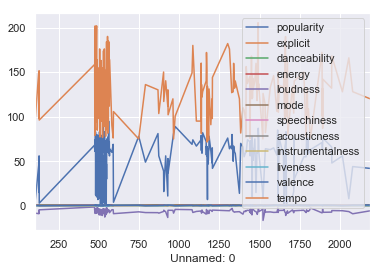

In [36]:
pd.DataFrame(relevant_info).plot.line(legend = True)

In [37]:
new = total.select_dtypes(exclude = ["object"]).iloc[:, 2:14]
new["label"] = total["label"]

In [38]:
new.corr()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.016717,0.075552,-0.012692,0.095071,-0.005811,-0.053697,0.016597,-0.076194,-0.067020,-0.002213,-0.001763
explicit,-0.016717,1.000000,0.332260,0.051737,0.081921,-0.115848,0.380410,-0.157394,-0.116086,0.072581,-0.095331,0.037185
danceability,0.075552,0.332260,1.000000,0.184247,0.259675,-0.098738,0.132572,-0.337825,-0.235403,-0.050782,0.329218,0.017201
energy,-0.012692,0.051737,0.184247,1.000000,0.738225,-0.045836,0.034115,-0.585175,-0.172673,0.177102,0.371876,0.155457
loudness,0.095071,0.081921,0.259675,0.738225,1.000000,-0.057258,-0.060958,-0.479288,-0.301641,0.064826,0.274873,0.118518
mode,-0.005811,-0.115848,-0.098738,-0.045836,-0.057258,1.000000,-0.083992,0.087499,-0.024628,0.000687,0.034354,-0.018321
speechiness,-0.053697,0.380410,0.132572,0.034115,-0.060958,-0.083992,1.000000,-0.040713,-0.085053,0.081203,0.029096,0.079637
acousticness,0.016597,-0.157394,-0.337825,-0.585175,-0.479288,0.087499,-0.040713,1.000000,0.133680,-0.065196,-0.170166,-0.161924
instrumentalness,-0.076194,-0.116086,-0.235403,-0.172673,-0.301641,-0.024628,-0.085053,0.133680,1.000000,-0.031017,-0.155271,-0.043787
liveness,-0.067020,0.072581,-0.050782,0.177102,0.064826,0.000687,0.081203,-0.065196,-0.031017,1.000000,0.082393,0.038818


In [39]:
total = total.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)

In [40]:
total_info = []
total2 = total.select_dtypes(exclude = ["object"])
total2["label"] = total["label"]    
for element in total["label"].unique():
    temp_df = total2[total2["label"] == element].iloc[:, 0:12]
    total_info.append(temp_df.describe().iloc[1, :].rename(element))
analysis = pd.DataFrame(total_info)


C:\Users\aviga\MiniConda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
analysis.columns

Index(['popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

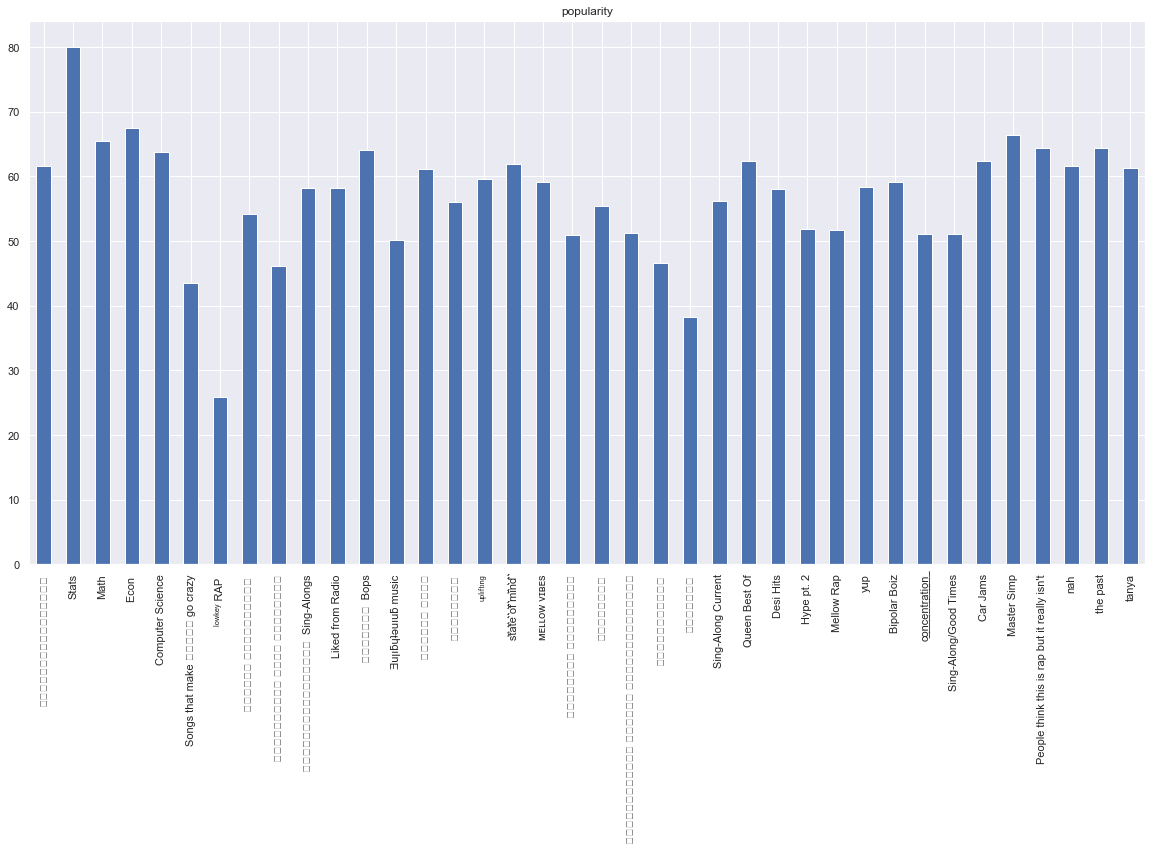

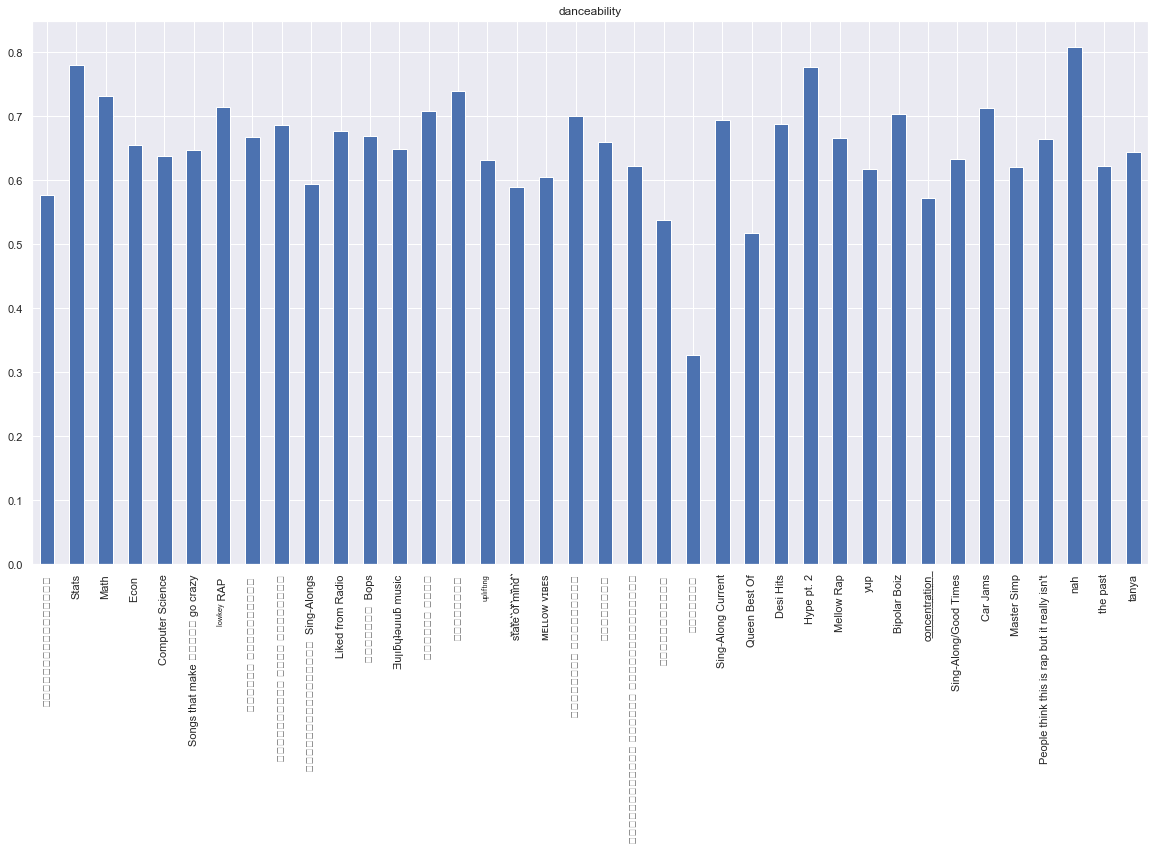

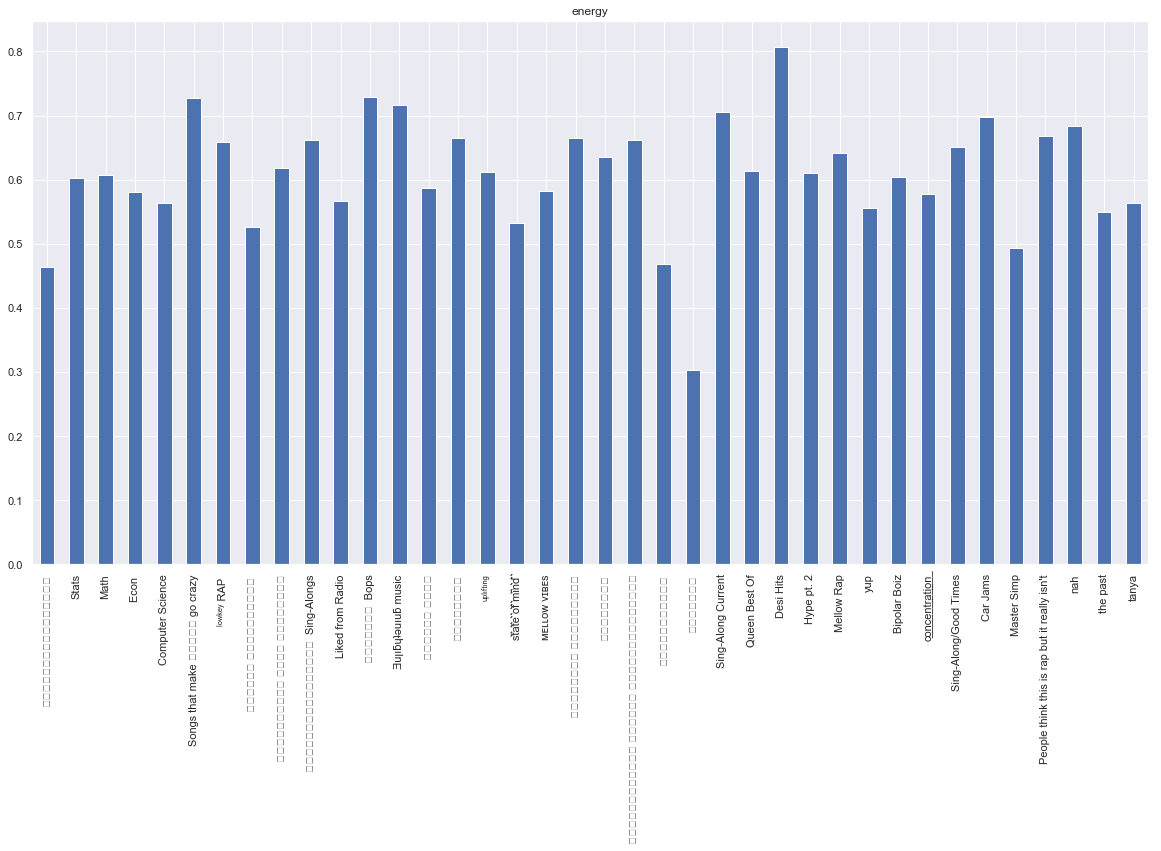

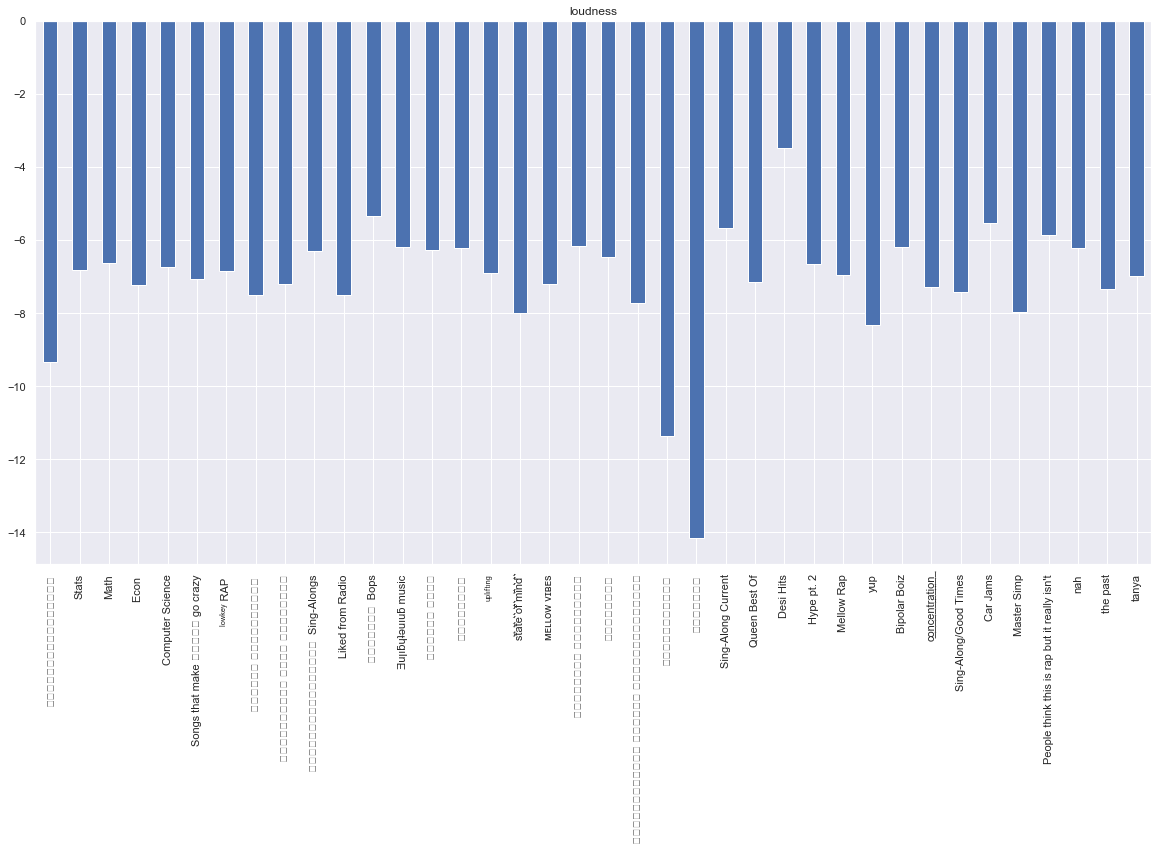

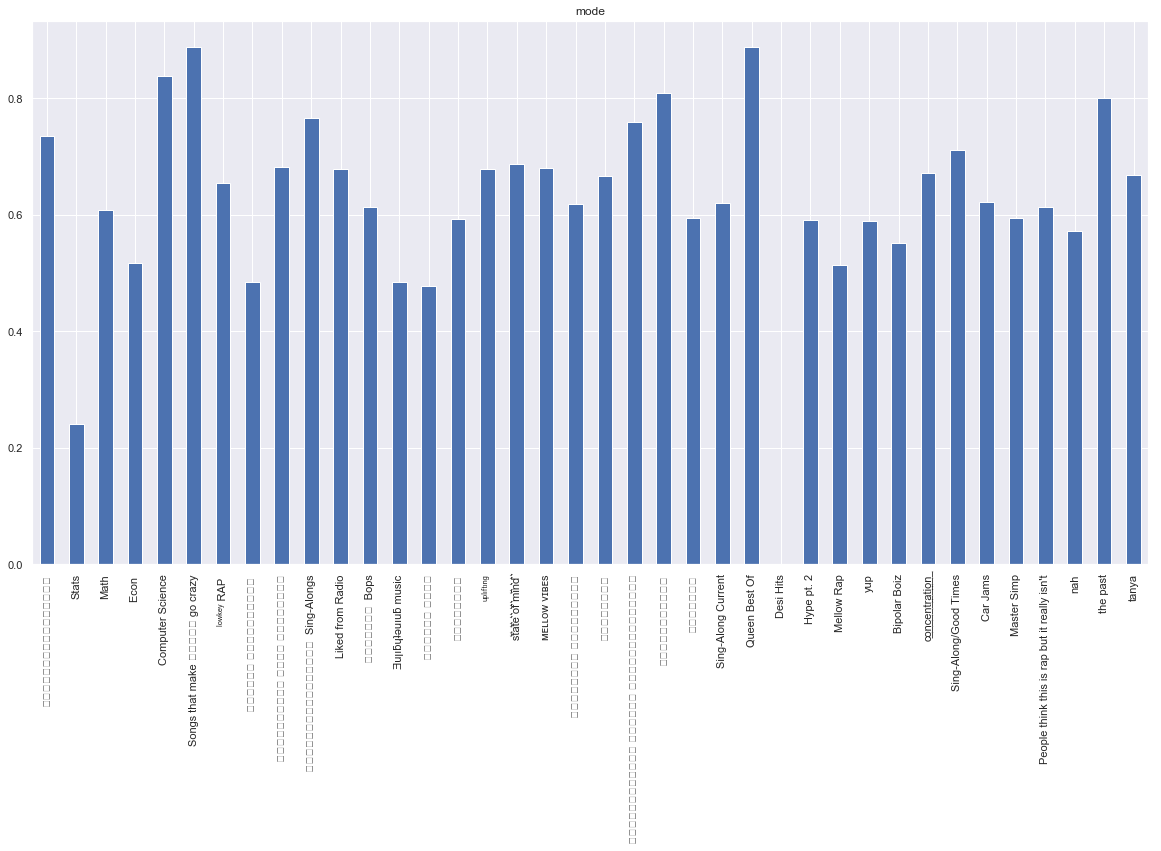

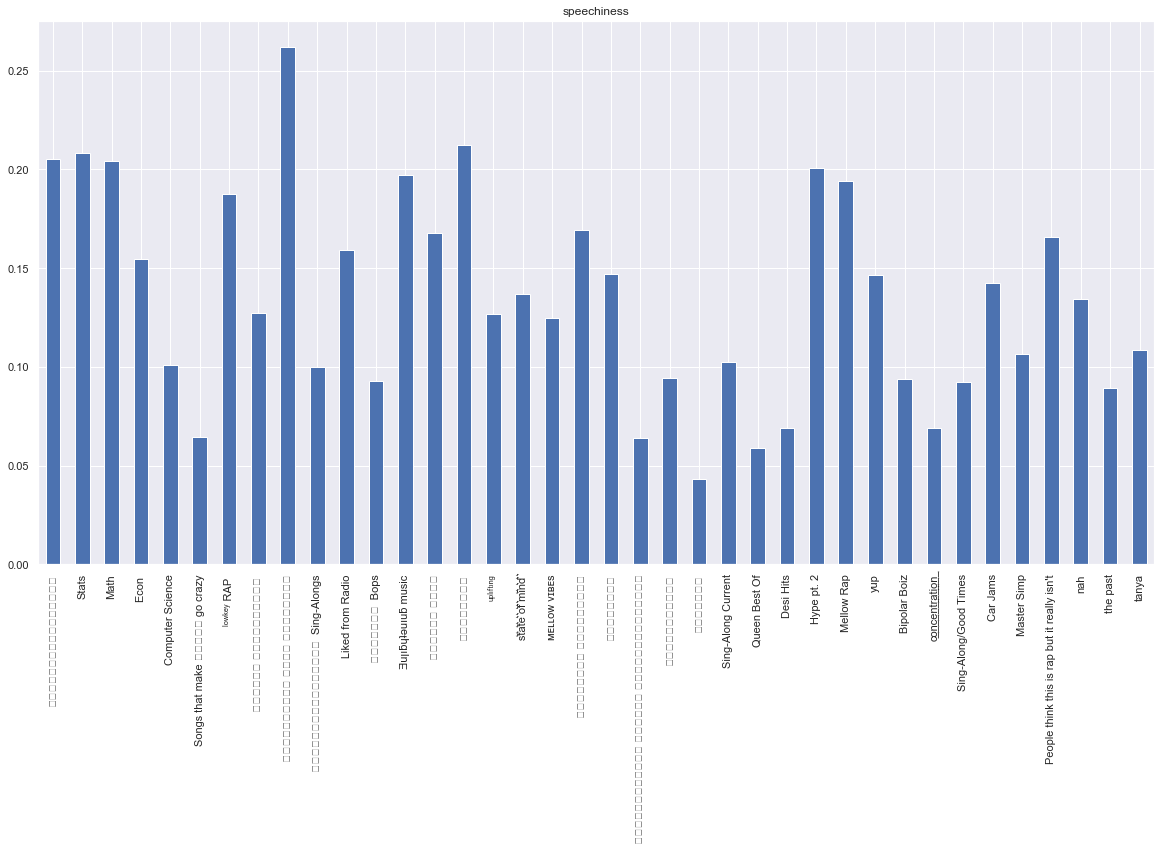

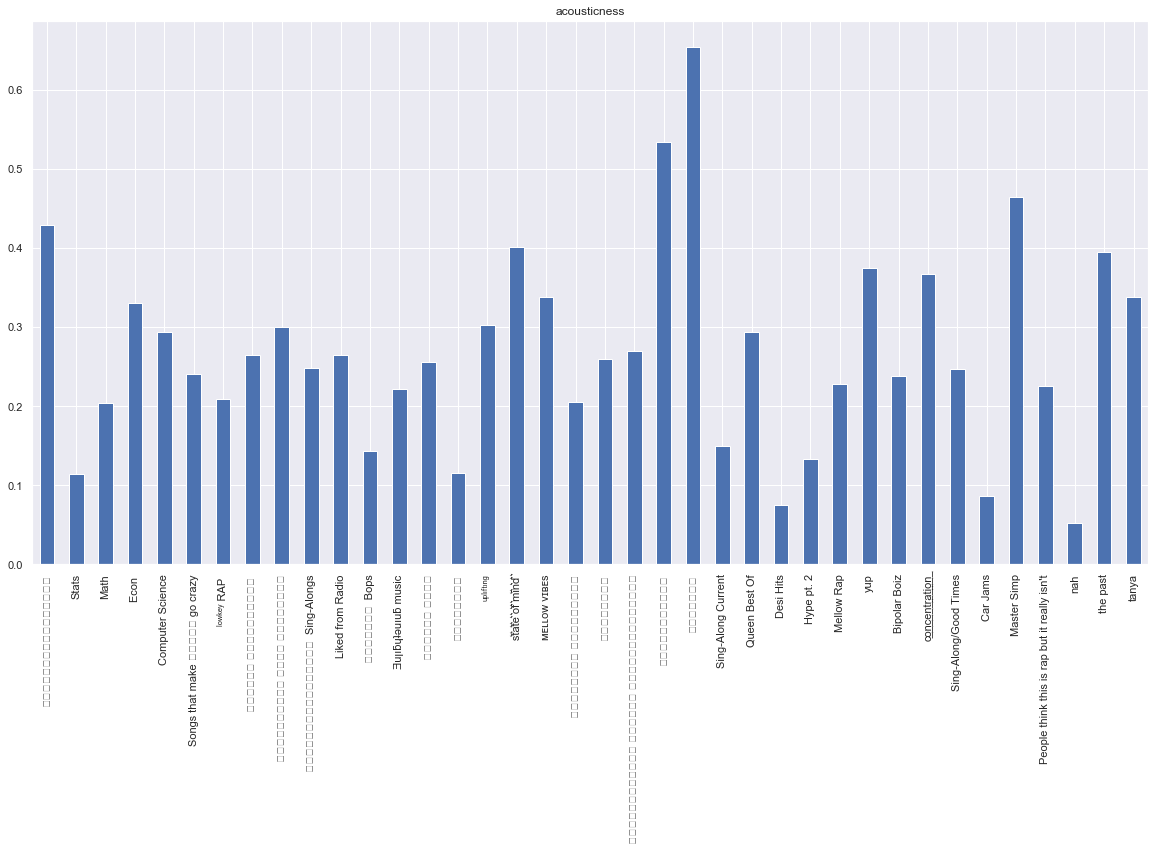

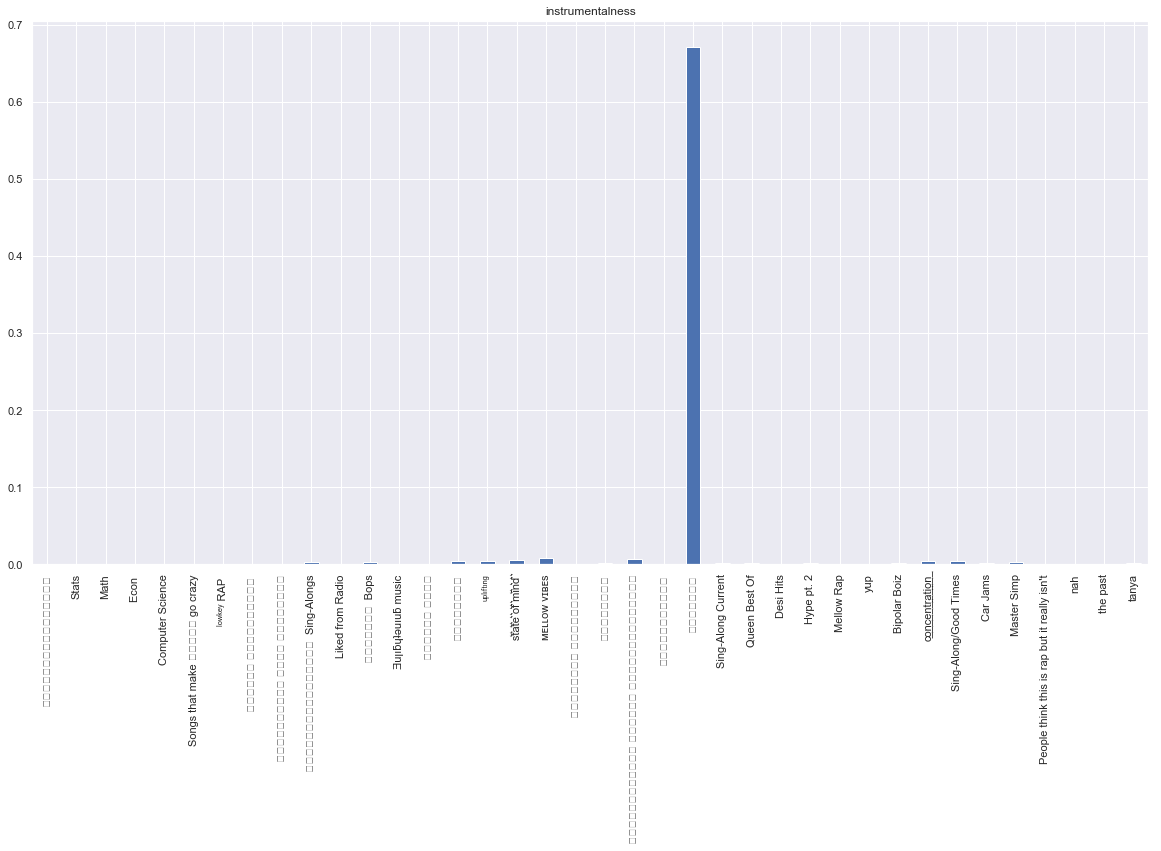

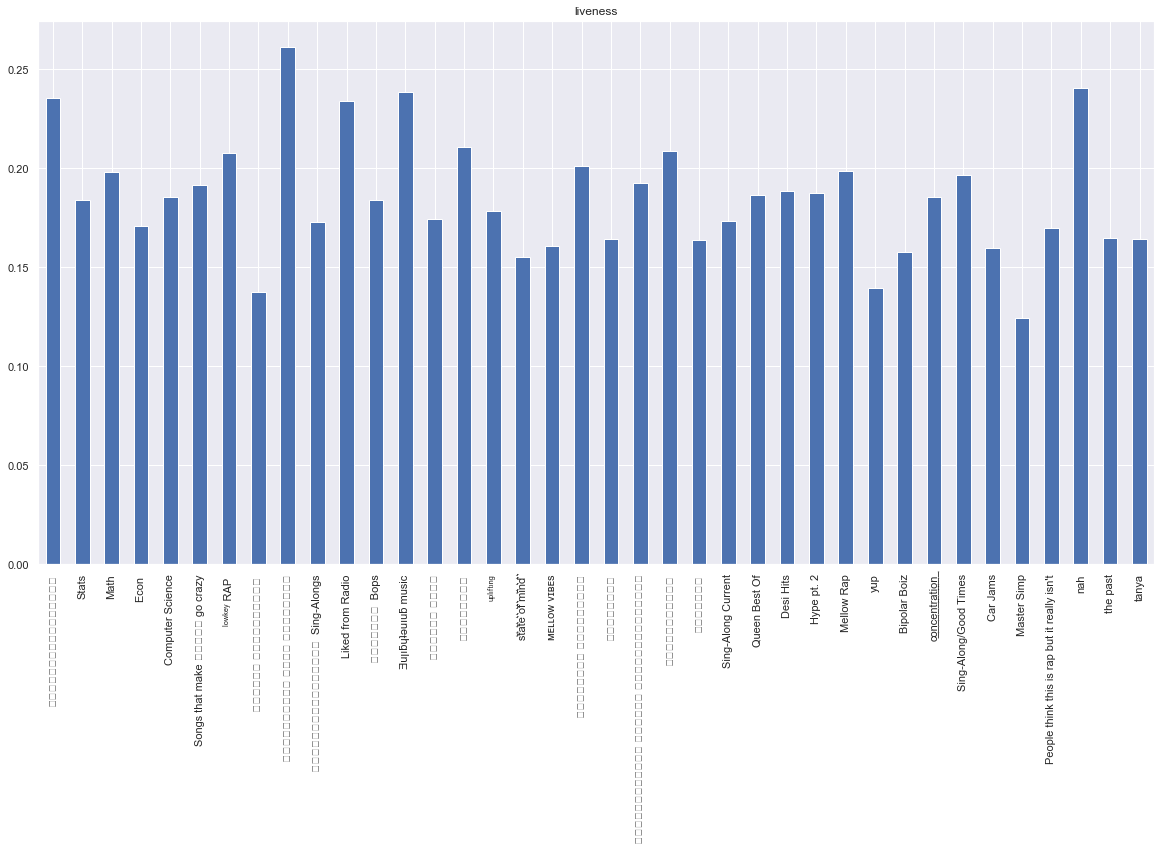

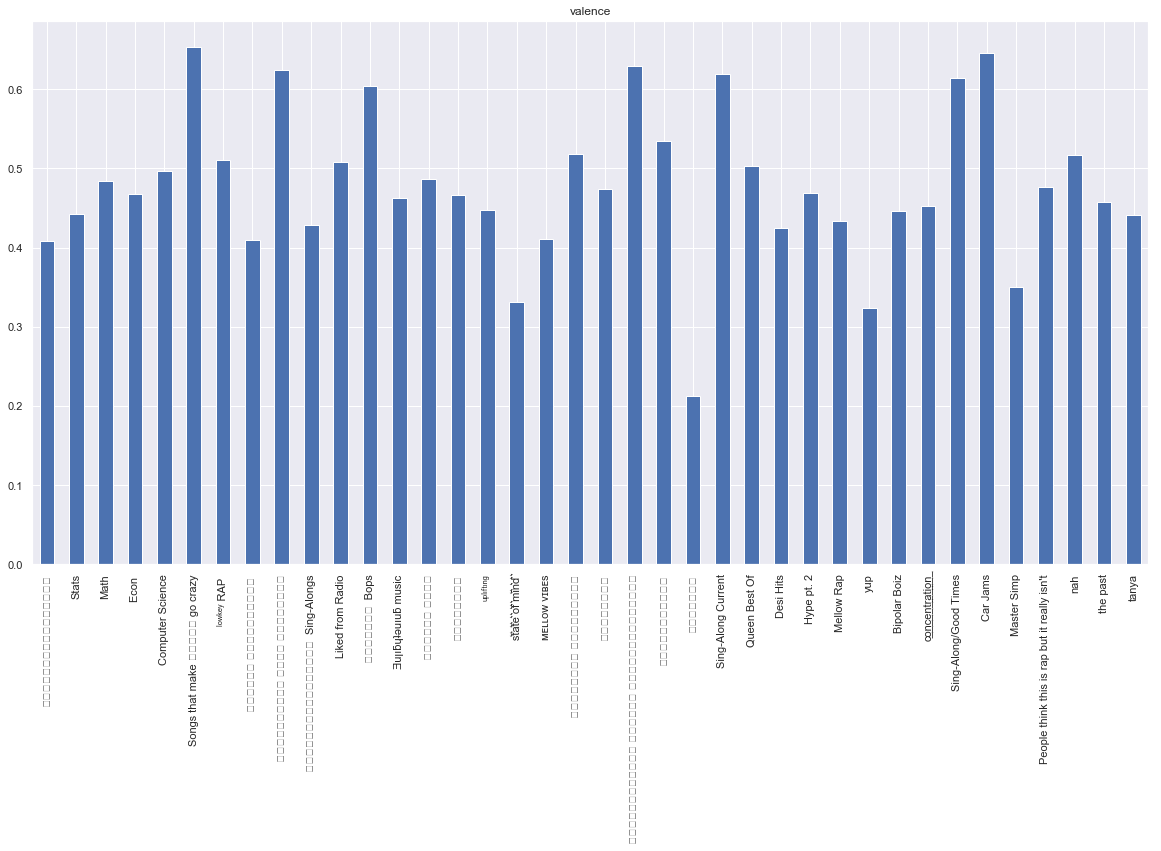

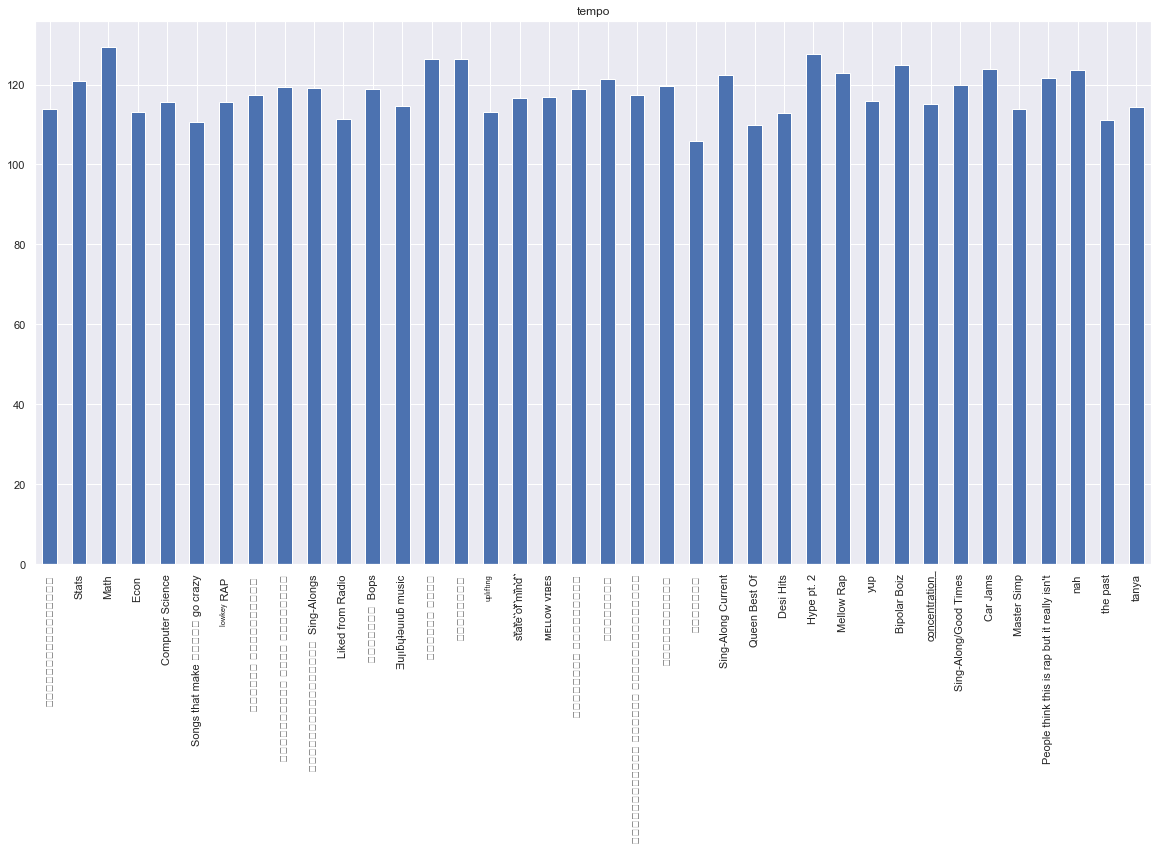

In [42]:
visual_dic = {}
for a in analysis.columns:
    visual_dic[a] = analysis[a].plot.bar(figsize = (20, 10), title = a)
    plt.show()
    
for key in visual_dic.keys():
    visual_dic[key].plot()